In [67]:
import numpy as np
import matplotlib.pyplot as plt

##### Here, no parameter values are provided in the question. So, I am taking the case for the deflection of electrons by the gold atoms (Z = 79, n = 5.9e28 atoms/m^3)
##### Also for electron density, I am taking it as 1e23 electrons/m^3 (My choice)

In [68]:
def vel_dis(v, T):
    """Function for the given velocity distribution"""
    m = 9.1e-31
    k = 1.38e-23
    return v**4 * np.exp( - (m*v**2)/(2*k*T)) * (1 + 0.3*(m*v**2)/(k*T))

In [69]:
def dpdw_v(v, T, omega):
    """Gives the power pwe frequency per velocity"""
    ## Parameters
    ne = 1e23
    ni = 5.9e28
    c = 3e8
    m = 9.1e-31
    z = 79
    epsilon = 8.854e-12
    e = 1.6e-19
    h = 6.626e-34

    ## Calculation for bmax and bmin
    bmax = v/omega

    bmin_c = z*e**2/(2*np.pi*epsilon*m*v**2)
    bmin_q = h/(m*v)
    bmin = np.maximum(bmin_c, bmin_q)                ## We have to choose the value which is larger

    ## Calculation for power
    power = ((16*e**6)/(3*c**3 * m**2))*9e9 * (1/v) * ne*ni * z**2 * np.log(bmax/bmin)
    return power

In [70]:
def dpdw_T(T, omega):
    """ Calculates the power at constant """
    ## Parameters
    m = 9.1e-31
    h = 6.626e-34

    ## Calculation for the numerator
    v_min = np.sqrt(2*h*omega/(2*np.pi*m))
    v = np.linspace(v_min, 3e8, 100000)                ## As nothing can exceed speed of light
    num = np.sum( dpdw_v(v, T, omega)*vel_dis(v, T) )

    ## Calculation for the denominator
    v_new = np.linspace(0, 3e8, 100000)
    denom = np.sum( vel_dis(v_new, T) )

    return num/denom if num/denom > 0 else 0 ## As classical approximation is valid only upto the regime when b_max > b_min. Exceeding that, power becomes -ve

In [71]:
def power_plot(T, max_f):
    """ Function that uses all the above functions and gives us the final plot"""
    omega = np.linspace(int(max_f)/500, int(max_f), 500)
    power = np.zeros_like(omega)

    for i in range(len(power)):
        power[i] = dpdw_T(T, omega[i])

    # Find where power crosses zero
    zero_idx = np.where(np.diff(np.sign(power)))[0]
    if len(zero_idx) > 0:
        idx = zero_idx[0]
        omega_zero = omega[idx]
        power_zero = power[idx]
    else:
        omega_zero, power_zero = None, None

    # Plotting
    plt.figure(figsize=(8,6))
    plt.plot(omega, power, color='tab:blue', lw=1, label="Power spectrum")
    if omega_zero is not None:
        plt.scatter(omega_zero, power_zero, color='red', zorder=5, label="Zero crossing")
        plt.text( omega_zero, power_zero*1.1, f"ω₀ ≈ {omega_zero:.3e} rad/s", color='red', fontsize=9, ha='right', va = 'top' )

    T_label = f"{T:.2e}" if T > 1e3 else f"{T:.0f}"
    plt.title(f"Bremsstrahlung Power vs Frequency (T = {T_label} K)")
    plt.xlabel(r"Angular frequency $\omega$ (rad/s)")
    plt.ylabel(r"Power per unit frequency per unit volume (W·s/m³)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


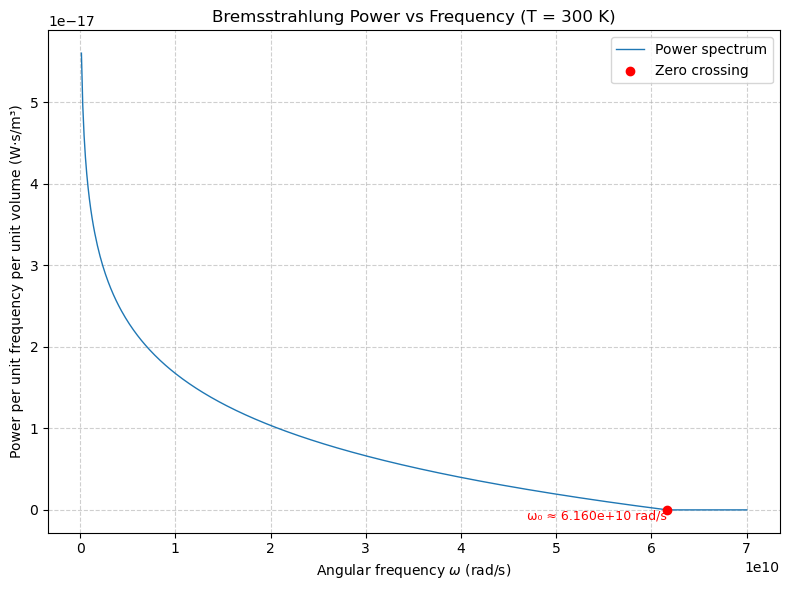

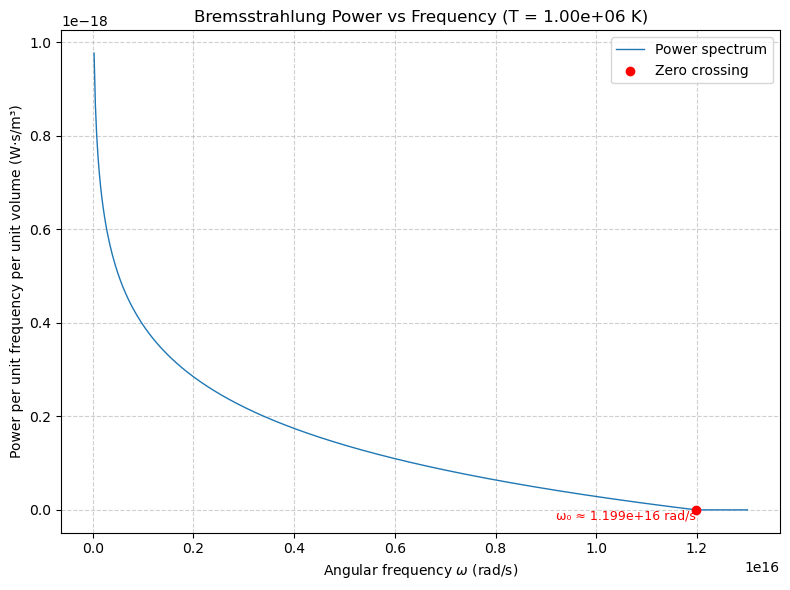

In [72]:
power_plot(300, 0.7e11)
power_plot(1e6, 1.30e16)